In [35]:
%load_ext autoreload
%autoreload 2

import rare_traffic_sign_solution as rtss
import lib

import torch
import torchvision
from torchvision import transforms as T
from torch.utils.data import Dataset, DataLoader, random_split
from torch import nn
import torch.nn.functional as F
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
from torchvision.datasets import ImageFolder

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from math import floor, ceil
from sklearn.model_selection import train_test_split

import shutil
import requests
import functools
import pathlib
from pathlib import Path
import shutil
from tqdm.notebook import tqdm
import os
from collections import defaultdict

from IPython.display import clear_output

matplotlib.rcParams['figure.figsize'] = (20, 1)

MEAN = np.array([0.485, 0.456, 0.406])
STD = np.array([0.229, 0.224, 0.225])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
model = rtss.CustomNetwork(features_criterion=None, classes_file='classes.json')
model.load_state_dict(torch.load('/home/alexkkir/cv-hw10-road-signs/runs/synt_2/epoch=13-val_acc=0.978.ckpt', map_location='cpu')['state_dict'])

<All keys matched successfully>

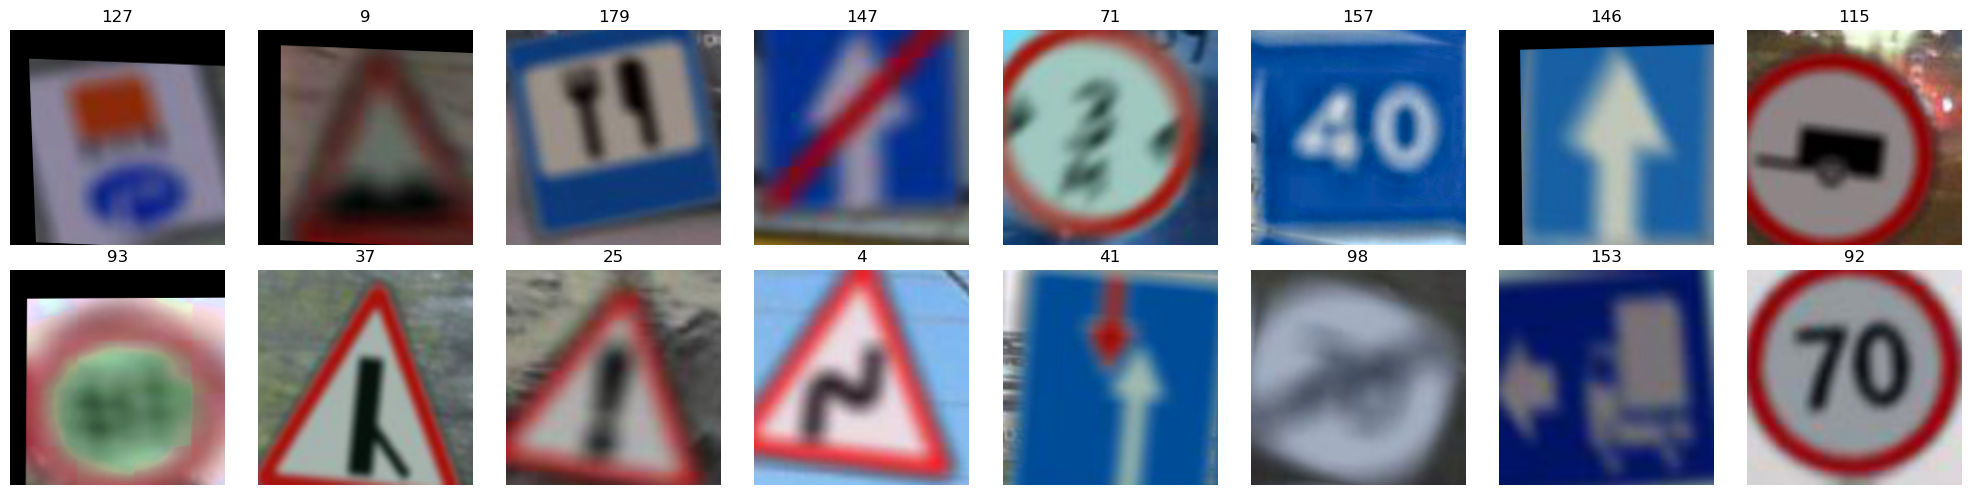

In [43]:
dataset_train = rtss.DatasetRTSD(
    ['synthetic_3'],
    'classes.json',
)

dataset_test = rtss.DatasetRTSD(
    ['cropped-train'],
    'classes.json',
)

batch_size = 16
train_loader = DataLoader(dataset_train, batch_size=batch_size, num_workers=16, shuffle=True)
valid_loader = DataLoader(dataset_test, batch_size=batch_size, num_workers=16, shuffle=True)

lib.display_loader(train_loader)
# lib.display_loader(valid_loader)

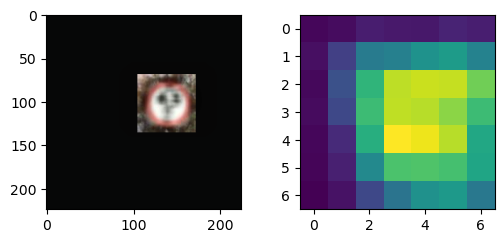

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


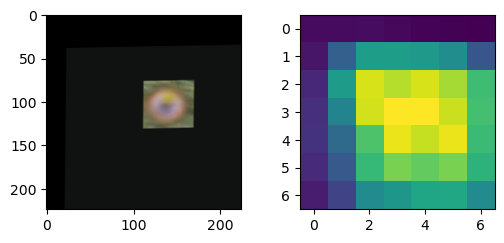

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


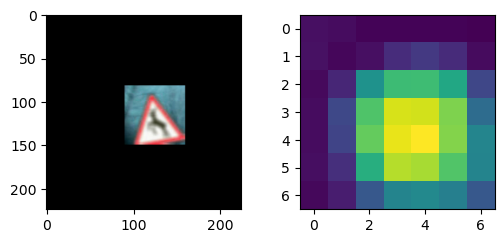

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


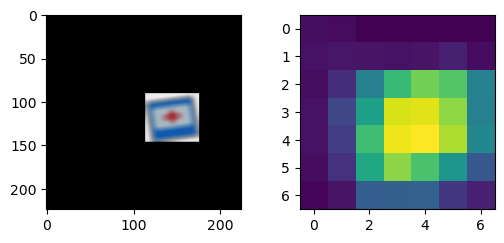

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


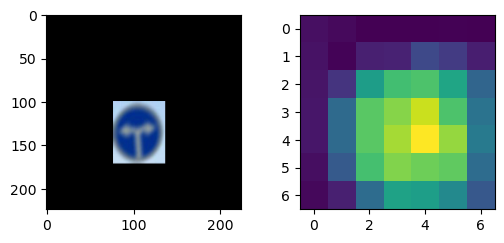

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


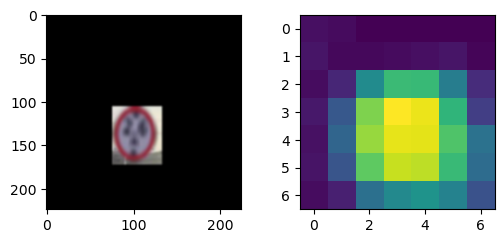

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


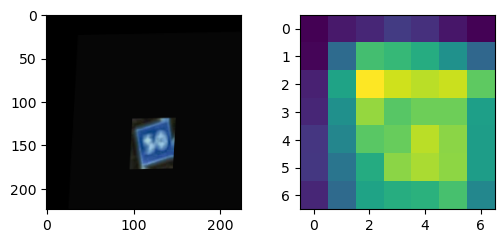

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


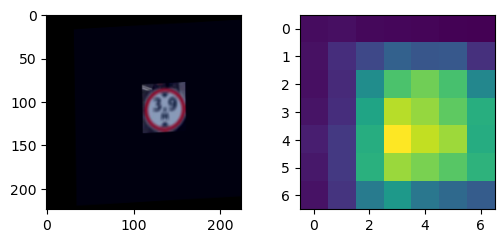

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


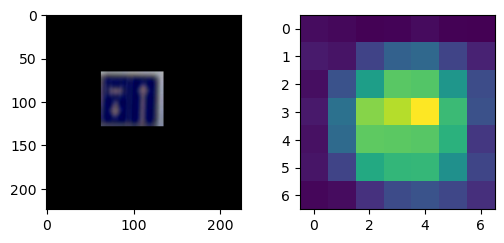

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


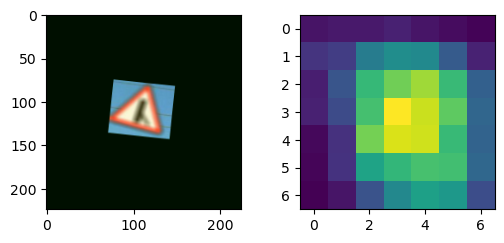

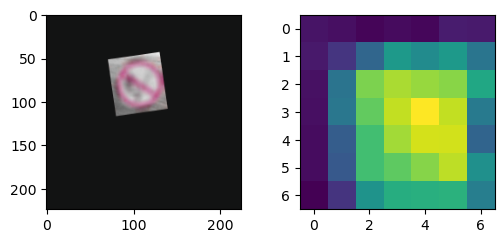

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


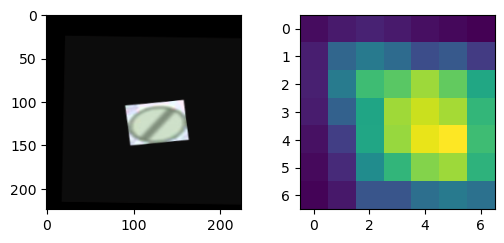

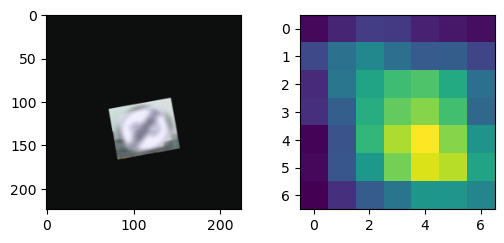

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


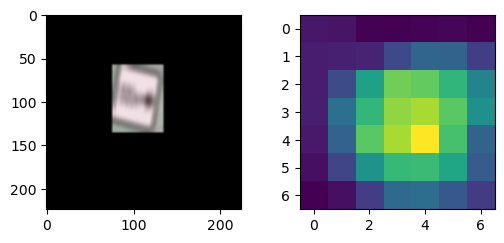

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


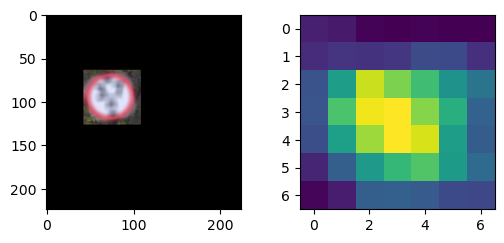

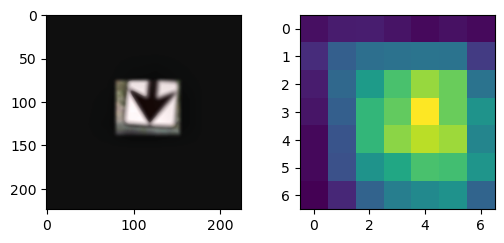

In [42]:
batch = next(iter(train_loader))
images = batch[0]
features = model.features(images)

for i in range(batch_size):

    plt.figure(figsize=(6, 3 * batch_size))

    plt.subplot(batch_size, 2, 1)
    plt.imshow(images[i].permute(1, 2, 0) * STD + MEAN)

    plt.subplot(batch_size, 2, 2)
    plt.imshow(features[i].mean(axis=0).detach().numpy())
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


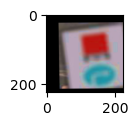

In [ ]:
plt.imshow(images[0].permute(1, 2, 0) * STD + MEAN)

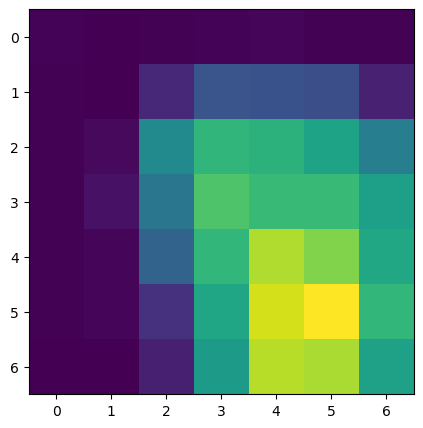

In [ ]:
plt.imshow(features[0].mean(axis=0).detach().numpy())

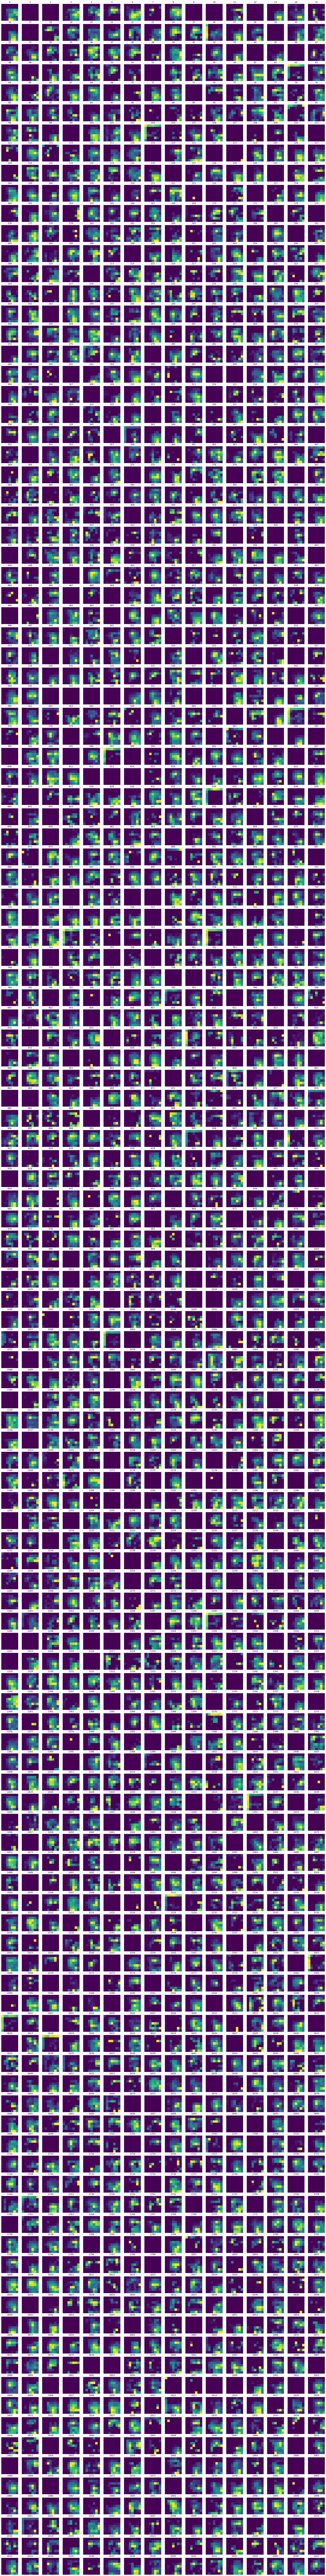

In [ ]:
def print_features(features, cols = 16):
    fig_size = 2
    rows = np.ceil(len(features) / cols).astype('int')
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (fig_size * cols, fig_size * rows))
    for i in range(len(features)):
        image = features[i].detach().numpy()
        label = i
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_title(label)
        ax.ravel()[i].set_axis_off()
    plt.figure

print_features(features[0][:2048])